# Algoritmo de clasificación ruido de tráfico

###### El siguiente algoritmo emplea como descriprotes MFCC, ZCR, Spectral centroid y spectral roll off como vectores de características y se extraen con ayuda de la librera librosa. Como método de clasficación se usa un SVM multiclase con un kernel radial.

## Pasos
###### 1. Leer los archivos de audio, que se encuentran separados por clase en carpetas.



In [2]:

import os
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import  librosa


# leer los directorios de las carpetas y separar los archivos que son de audio

pwd1 = "/home/aaccol/DATABASES/GCM/Isolated/liviano"
pwd2 = "/home/aaccol/DATABASES/GCM/Isolated/moto"
pwd3 = "/home/aaccol/DATABASES/GCM/Isolated/pesado"
pwd4 = "/home/aaccol/DATABASES/GCM/Isolated/pito_ag"


def load_audios(path):
    #funcion que carga los archivos wav en una lista de python 
    files = os.listdir(path) # listar los nombres de archivos que estan dentro del directorio
    audiofiles = [(path+"/"+f) for f in files if f.endswith('.wav')] # verificar si son .wav y añadirlos las rutas a una lista
    signals = [librosa.load(p)[0] for p in audiofiles] # cargar los vectores de audio en una lista
    return signals

        
# cargar los archivos .wav en una lista de python

l_signals = load_audios(pwd1)
m_signals = load_audios(pwd2)
p_signals = load_audios(pwd3)
h_signals = load_audios(pwd4)

c1 = len(l_signals)
c2 = len(m_signals)
c3 = len(p_signals)
c4 = len(h_signals)
    
print "hay " + str(c1) + " archivos de livianos"
print "hay " + str(c2) + " archivos de motos"
print "hay " + str(c3) + " archivos de pesados"
print "hay " + str(c4) + " archivos de bocinas"


hay 141 archivos de livianos
hay 162 archivos de motos
hay 122 archivos de pesados
hay 98 archivos de bocinas


##### 2. Extraer los descriptores por medio de la librera librosa.



In [3]:
# Extraer los descriptores de todos los audios
# Since v0.3, librosa uses centered frames, so that the kth frame is centered around sample k * hop_length

w_size = 512
hop = 256
fs = 22050

def extract_features(signals,w_size,hop,fs):
    zcr = np.array([librosa.feature.zero_crossing_rate(s,frame_length=w_size, hop_length=hop) for s in signals])
    sc = np.array([librosa.feature.spectral_centroid(y=s, sr=fs, S=None, n_fft=w_size, hop_length=hop) for s in signals])
    sr = np.array([librosa.feature.spectral_rolloff(y=s, sr=fs, S=None, n_fft=w_size, hop_length=hop, freq=None, roll_percent=0.85) for s in signals])
    return zcr, sc, sr


l_zcr, l_sc, l_sr = extract_features(l_signals,w_size,hop,fs)
m_zcr, m_sc, m_sr = extract_features(m_signals,w_size,hop,fs)
p_zcr, p_sc, p_sr = extract_features(p_signals,w_size,hop,fs)
h_zcr, h_sc, h_sr = extract_features(h_signals,w_size,hop,fs)

# promedios y desviacion estandar

mean_l_zcr = [np.mean(s[0]) for s in l_zcr]
mean_m_zcr = [np.mean(s[0]) for s in m_zcr]
mean_p_zcr = [np.mean(s[0]) for s in p_zcr]
mean_h_zcr = [np.mean(s[0]) for s in h_zcr]

var_l_zcr = [np.var(s[0]) for s in l_zcr]
var_m_zcr = [np.var(s[0]) for s in m_zcr]
var_p_zcr = [np.var(s[0]) for s in p_zcr]
var_h_zcr = [np.var(s[0]) for s in h_zcr]

mean_l_sc = [np.mean(s[0]) for s in l_sc]
mean_m_sc = [np.mean(s[0]) for s in m_sc]
mean_p_sc = [np.mean(s[0]) for s in p_sc]
mean_h_sc = [np.mean(s[0]) for s in h_sc]

var_l_sc = [np.var(s[0]) for s in l_sc]
var_m_sc = [np.var(s[0]) for s in m_sc]
var_p_sc = [np.var(s[0]) for s in p_sc]
var_h_sc = [np.var(s[0]) for s in h_sc]

mean_l_sr = [np.mean(s[0]) for s in l_sr]
mean_m_sr = [np.mean(s[0]) for s in m_sr]
mean_p_sr = [np.mean(s[0]) for s in p_sr]
mean_h_sr = [np.mean(s[0]) for s in h_sr]

var_l_sr = [np.var(s[0]) for s in l_sr]
var_m_sr = [np.var(s[0]) for s in m_sr]
var_p_sr = [np.var(s[0]) for s in p_sr]
var_h_sr = [np.var(s[0]) for s in h_sr]


## MFCC

n=20

l_mfcc = [librosa.feature.mfcc(s, n_fft=w_size, hop_length=hop, sr=fs, n_mfcc=n) for s in l_signals]
l_mfcc_d = [librosa.feature.delta(mfcc) for mfcc in l_mfcc]


m_mfcc = [librosa.feature.mfcc(s, n_fft=w_size,hop_length=hop, sr=fs, n_mfcc=n) for s in m_signals]
m_mfcc_d = [librosa.feature.delta(mfcc) for mfcc in m_mfcc]


p_mfcc = [librosa.feature.mfcc(s, n_fft=w_size,hop_length=hop, sr=fs, n_mfcc=n) for s in p_signals]
p_mfcc_d = [librosa.feature.delta(mfcc) for mfcc in p_mfcc]


h_mfcc = [librosa.feature.mfcc(s, n_fft=w_size,hop_length=hop, sr=fs, n_mfcc=n) for s in h_signals]
h_mfcc_d = [librosa.feature.delta(mfcc) for mfcc in h_mfcc]


mean_l_mfcc = [e.mean(axis = 1) for e in l_mfcc]
mean_m_mfcc = [e.mean(axis = 1) for e in m_mfcc]
mean_p_mfcc = [e.mean(axis = 1) for e in p_mfcc]
mean_h_mfcc = [e.mean(axis = 1) for e in h_mfcc]


var_l_mfcc = [[np.var(e[j]) for j in range(n)]for e in l_mfcc]
var_m_mfcc = [[np.var(e[j]) for j in range(n)]for e in m_mfcc]
var_p_mfcc = [[np.var(e[j]) for j in range(n)]for e in p_mfcc]
var_h_mfcc = [[np.var(e[j]) for j in range(n)]for e in h_mfcc]

print 'Extracción de descriptores completada...'


   


Extracción de descriptores completada...


#### 3. Creación matriz de descriptores

In [4]:
# creacion de matriz de los descriptores

liviano = [[mean_l_sc[i], mean_l_sr[i], mean_l_zcr[i], var_l_sc[i], var_l_sr[i], var_l_zcr[i]]  for i in range(c1)]
moto = [[mean_m_sc[i], mean_m_sr[i], mean_m_zcr[i], var_m_sc[i], var_m_sr[i], var_m_zcr[i]]  for i in range(c2)]
pesado = [[mean_p_sc[i], mean_p_sr[i], mean_p_zcr[i], var_p_sc[i], var_p_sr[i], var_p_zcr[i]]  for i in range(c3)]
pito = [[mean_h_sc[i], mean_h_sr[i], mean_h_zcr[i], var_h_sc[i], var_h_sr[i], var_h_zcr[i]]  for i in range(c4)]

# concatenacion de los diferentes tipos

data =[]
for i in range(c1):
    data.append(liviano[i])
for i in range(c2):
    data.append(moto[i])
for i in range(c3):
    data.append(pesado[i])
for i in range(c4):
    data.append(pito[i])
    
data_mfcc =[]
for i in range(c1):
    data_mfcc.append(mean_l_mfcc[i])
for i in range(c2):
    data_mfcc.append(mean_m_mfcc[i])
for i in range(c3):
    data_mfcc.append(mean_p_mfcc[i])
for i in range(c4):
    data_mfcc.append(mean_h_mfcc[i])
    

    
#data_mixed = []
#data_mixed_all = [ele + data[i][:-3] for i, ele in enumerate(data_mfcc)]
#data_mixed_zcr = [ele + data[i][2:-3] for i, ele in enumerate(data_mfcc)]
#data_mixed_sc = [ele + data[i][:-5] for i, ele in enumerate(data_mfcc)]
#data_mixed_sr = [ele + data[i][1:-4] for i, ele in enumerate(data_mfcc)]

    
label =[]
for i in range(c1):
    label.append('Liviano')
for i in range(c2):
    label.append('Moto')
for i in range(c3):
    label.append('Pesado')
for i in range(c4):
    label.append('Bocina')
    

    
print 'Matriz de descriptores creada...'



Matriz de descriptores creada...


#### 4. entrenamiento del modelo

In [5]:

from sklearn.preprocessing import scale
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.externals import joblib

import itertools

X = data_mfcc

#particion de los datos en entrenamiento y prueba
x, y = X, label
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#entrenamiento del SVM
# probar diferentes valores para C y para Gamma

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
 ]
svr = svm.SVC()
clf = GridSearchCV(svr, param_grid)
clf.fit(X_train,y_train)

scores = cross_val_score(clf, X, label, cv=5)


print(clf.best_params_)
best_param = clf.best_params_
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



#puntajes
y_pred = clf.predict(X_test)
print "porcentaje de éxito: " + str(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print report

# save the model to disk
filename = 'clasificador_trafico.sav'
joblib.dump(clf, filename)


{'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
Accuracy: 0.83 (+/- 0.10)
porcentaje de éxito: 0.859872611465
             precision    recall  f1-score   support

     Bocina       0.96      0.93      0.95        28
    Liviano       0.90      0.92      0.91        38
       Moto       0.82      0.87      0.84        53
     Pesado       0.80      0.74      0.77        38

avg / total       0.86      0.86      0.86       157



['clasificador_trafico.sav']

#### 5. Matriz de confusión

Matriz de confusion, sin normalizacion
[[26  0  2  0]
 [ 0 35  2  1]
 [ 0  1 46  6]
 [ 1  3  6 28]]
Matriz de confusion normalizada
[[ 0.93  0.    0.07  0.  ]
 [ 0.    0.92  0.05  0.03]
 [ 0.    0.02  0.87  0.11]
 [ 0.03  0.08  0.16  0.74]]


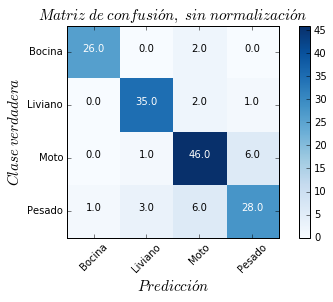

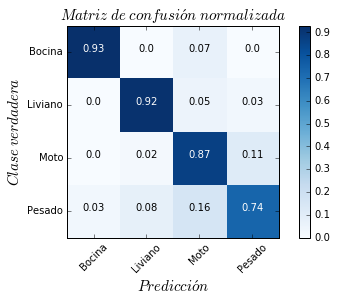

In [6]:
#matriz de confusion


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusion normalizada")
    else:
        print('Matriz de confusion, sin normalizacion')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)



    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel(r'$Clase\; verdadera$',fontsize=15)
    plt.xlabel(r'$Predicci\'on$',fontsize=15)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = ["Bocina","Liviano","Moto","Pesado"]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title=r'$Matriz\; de\; confusi\'on,\; sin\; normalizaci\'on$')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title=r'$Matriz\;de\; confusi\'on\; normalizada$')

plt.savefig('matriz_conf.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

[0.96, 0.93, 0.95]
[0.9, 0.92, 0.91]
[0.82, 0.87, 0.84]
[0.8, 0.74, 0.77]
plotMat: [[0.96, 0.93, 0.95], [0.9, 0.92, 0.91], [0.82, 0.87, 0.84], [0.8, 0.74, 0.77]]
support: [28, 38, 53, 38]


/usr/local/lib/python2.7/dist-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


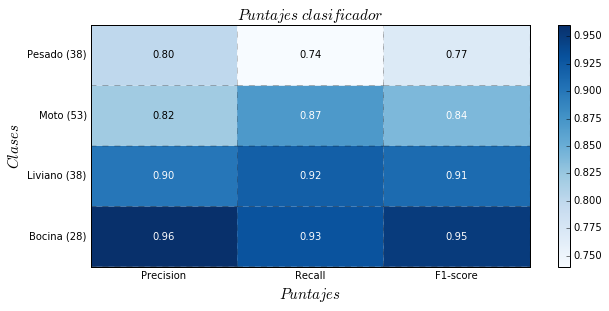

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):

    from itertools import izip
    pc.update_scalarmappable()
    ax = pc.get_axes()
    for p, color, value in izip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
 

    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title=r'$Puntajes\; clasificador$ ', cmap='Blues'):
  
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = r'$Puntajes$'
    ylabel = r'$Clases$'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)



plot_classification_report(report)
plt.savefig('test_plot_classif_report.png', dpi=300, format='png', bbox_inches='tight')
plt.show()
plt.close()





## Curvas de aprendizaje

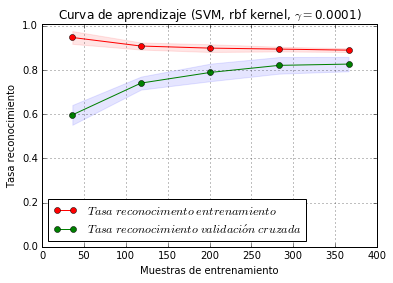

In [8]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Muestras de entrenamiento")
    plt.ylabel("Tasa reconocimiento")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label=r"$Tasa\; reconocimento\; entrenamiento$")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label=r"$Tasa\; reconocimiento\; validaci\'on\; cruzada$")

    plt.legend(loc="best")
    return plt


title = "Curva de aprendizaje (SVM, " + str(best_param['kernel'])+  " kernel, $\gamma=$" + str(best_param['gamma'])+")"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
estimator = svm.SVC(kernel=best_param['kernel'],C = best_param['C'], gamma = best_param['gamma'])
plot_learning_curve(estimator, title, x, y, (0.0, 1.01), cv=cv, n_jobs=4)
plt.savefig('learning_curve.png', dpi=300, format='png', bbox_inches='tight')
plt.show()
